# Q: Read "titanic.csv" and show?
1. Perform Preprocessing as per data.
2. How many passengers survived the incedent and how many died.
3. Who had higher survival rate (male Vs female).
4. Which class passengers survived the most.
5. What was the survival rate when considering their family size.
6. Predict the survival of the passengers using KNN, Logistic Regression, 
   Decision Tree, Random Forest, & Support Vector Machine.

# 1. Perform Preprocessing as per data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\Hadi Toori\Desktop\datasets\titanic dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

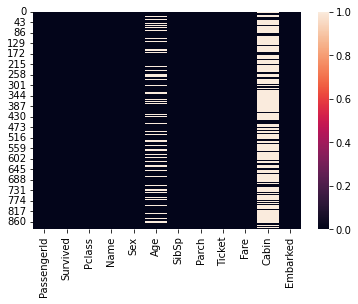

In [8]:
sns.heatmap(data.isna())

In [9]:
data = data.drop(['Name', 'Cabin', 'Embarked', 'Ticket'], axis = 1)

In [10]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [11]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


<AxesSubplot:>

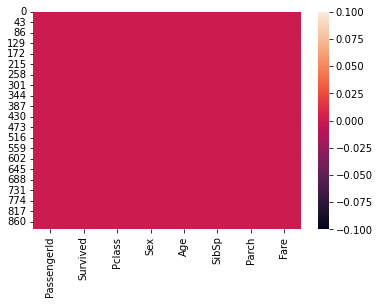

In [12]:
sns.heatmap(data.isna())

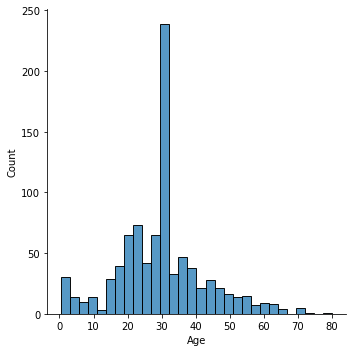

In [13]:
sns.displot(x='Age', data = data)

In [14]:
gender = pd.get_dummies(data['Sex'], drop_first=True)
data['Gender']=gender

In [15]:
#data.drop(['Sex'], axis = 1, inplace = True)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Gender
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,1


# 2. How many passengers survived the incedent and how many died

<AxesSubplot:xlabel='Survived', ylabel='count'>

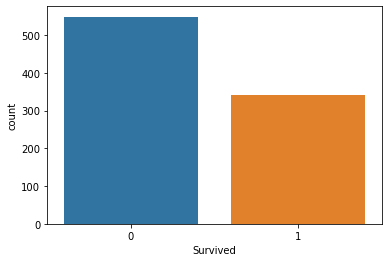

In [17]:
sns.countplot(x='Survived',data=data)

# 3. Who had higher survival rate (male Vs female).

<AxesSubplot:xlabel='Survived', ylabel='count'>

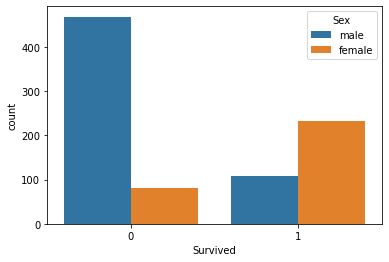

In [18]:
sns.countplot(x='Survived',data=data, hue = 'Sex')

# 4. Which class passengers survived the most.

<AxesSubplot:xlabel='Survived', ylabel='count'>

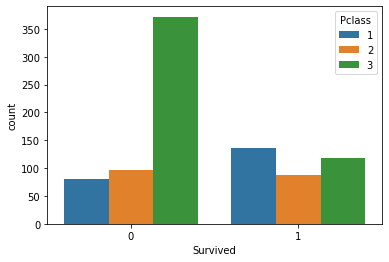

In [19]:
sns.countplot(x='Survived', data=data, hue='Pclass')

# 5. What was the survival rate when considering their family size.

<AxesSubplot:xlabel='Survived', ylabel='count'>

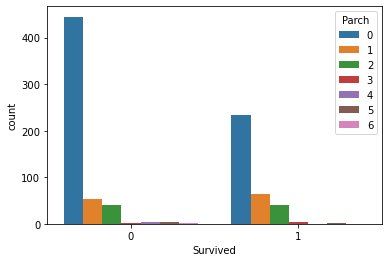

In [20]:
sns.countplot(x='Survived', data=data, hue='Parch')

# 6. Predict the survival of the passengers using KNN, Logistic Regression, Decision Tree, Random Forest, & Support Vector Machine.

In [21]:
x = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender']]
y = data['Survived']

In [22]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [23]:
from sklearn.model_selection import train_test_split

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =  0.33, random_state=42)

# Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()

In [82]:
lr.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
lr_pred = lr.predict(x_test)

In [ ]:
#plotting 



In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_test, lr_pred)

array([[151,  24],
       [ 38,  82]], dtype=int64)

In [86]:
from sklearn.metrics import classification_report
classification_report(y_test, lr_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.86      0.83       175\n           1       0.77      0.68      0.73       120\n\n    accuracy                           0.79       295\n   macro avg       0.79      0.77      0.78       295\nweighted avg       0.79      0.79      0.79       295\n'

In [87]:
from sklearn.metrics import precision_score
precision_score(y_test, lr_pred)

0.7735849056603774

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred)

0.7898305084745763

In [89]:
from sklearn.metrics import recall_score
recall_score(y_test, lr_pred)

0.6833333333333333

In [90]:
from sklearn.metrics import f1_score
f1_score(y_test, lr_pred)

0.7256637168141593

In [91]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr_pred)

array([[151,  24],
       [ 38,  82]], dtype=int64)

<AxesSubplot:>

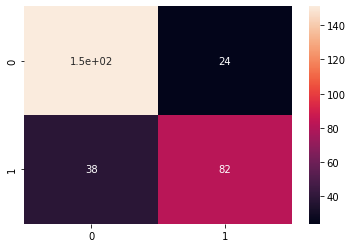

In [92]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True)

# Support Vector Machine

In [38]:
from sklearn.svm import SVC

In [39]:
svm = SVC()

In [93]:
svm.fit(x_train, y_train)

SVC()

In [94]:
svm_pred = svm.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, svm_pred)

0.6135593220338983

In [96]:
from sklearn.metrics import classification_report
classification_report(y_test, svm_pred)

'              precision    recall  f1-score   support\n\n           0       0.61      0.97      0.75       175\n           1       0.67      0.10      0.17       120\n\n    accuracy                           0.61       295\n   macro avg       0.64      0.53      0.46       295\nweighted avg       0.63      0.61      0.51       295\n'

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm_pred)

array([[169,   6],
       [108,  12]], dtype=int64)

<AxesSubplot:>

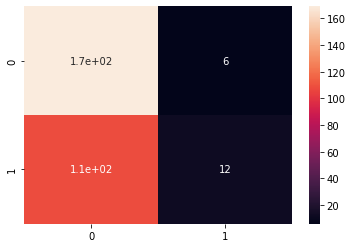

In [98]:
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True)

# KNN

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [100]:
knn = KNeighborsClassifier()

In [101]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [102]:
knn_pred = knn.predict(x_test)

In [103]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, knn_pred)

0.6474576271186441

In [104]:
from sklearn.metrics import classification_report
classification_report(y_test, knn_pred)

'              precision    recall  f1-score   support\n\n           0       0.66      0.84      0.74       175\n           1       0.61      0.37      0.46       120\n\n    accuracy                           0.65       295\n   macro avg       0.64      0.60      0.60       295\nweighted avg       0.64      0.65      0.62       295\n'

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn_pred)

array([[147,  28],
       [ 76,  44]], dtype=int64)

<AxesSubplot:>

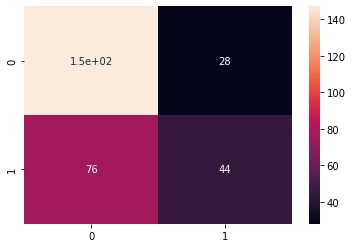

In [106]:
sns.heatmap(confusion_matrix(y_test, knn_pred), annot =True)

# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
decisiontree = DecisionTreeClassifier()

In [109]:
decisiontree.fit(x_train, y_train)

DecisionTreeClassifier()

In [110]:
decisionTree_pred = decisiontree.predict(x_test)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, decisionTree_pred)

0.7627118644067796

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, decisionTree_pred)

array([[142,  33],
       [ 37,  83]], dtype=int64)

In [113]:
from sklearn.metrics import classification_report 
classification_report(y_test, decisionTree_pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.81      0.80       175\n           1       0.72      0.69      0.70       120\n\n    accuracy                           0.76       295\n   macro avg       0.75      0.75      0.75       295\nweighted avg       0.76      0.76      0.76       295\n'

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
randomforest = RandomForestClassifier()

In [114]:
randomforest.fit(x_train, y_train)

RandomForestClassifier()

In [115]:
randomForest_pred = randomforest.predict(x_test)

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, randomForest_pred)

0.823728813559322

In [117]:
from sklearn.metrics import precision_score
precision_score(y_test, randomForest_pred)

0.8541666666666666

In [118]:
from sklearn.metrics import recall_score
recall_score(y_test, randomForest_pred)

0.6833333333333333

In [119]:
from sklearn.metrics import f1_score
f1_score(y_test, randomForest_pred)

0.7592592592592592

In [120]:
from sklearn.metrics import classification_report
classification_report(y_test, randomForest_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.92      0.86       175\n           1       0.85      0.68      0.76       120\n\n    accuracy                           0.82       295\n   macro avg       0.83      0.80      0.81       295\nweighted avg       0.83      0.82      0.82       295\n'

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, randomForest_pred)

array([[161,  14],
       [ 38,  82]], dtype=int64)

<AxesSubplot:>

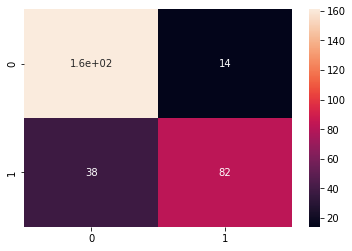

In [124]:
sns.heatmap(confusion_matrix(y_test, randomForest_pred), annot=True)

InvalidIndexError: (slice(None, None, None), None)

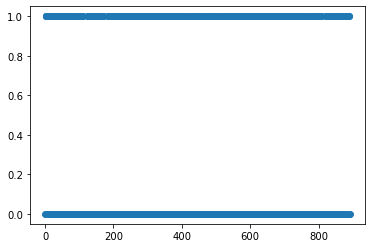

In [127]:
for i in x:
    plt.scatter(x[i], y)
    plt.plot(x_test, randomForest_pred) #randomforest.predict(x_test))